# Машинное обучение, ФКН ВШЭ

## Практическое задание 5

### Общая информация
Дата выдачи: 11.11.2019

Мягкий дедлайн: 1:59MSK 22.11.2019

Жесткий дедлайн: 23:59MSK 23.11.2019

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/15454/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 10 + бонус 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

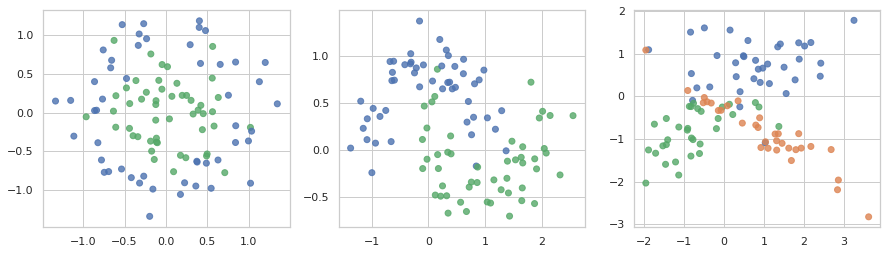

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

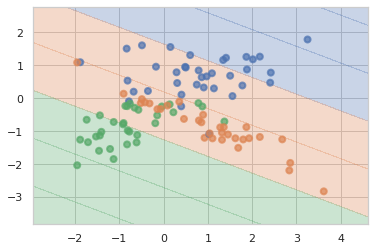

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [7]:
data = []
for i in range(len(datasets)):
    data.append(train_test_split(datasets[i][0], datasets[i][1], test_size=0.3, random_state=42))

Dataset 1
Train: 1.0 Test: 0.7666666666666667


Dataset 2
Train: 1.0 Test: 0.8666666666666667


Dataset 3
Train: 1.0 Test: 0.8




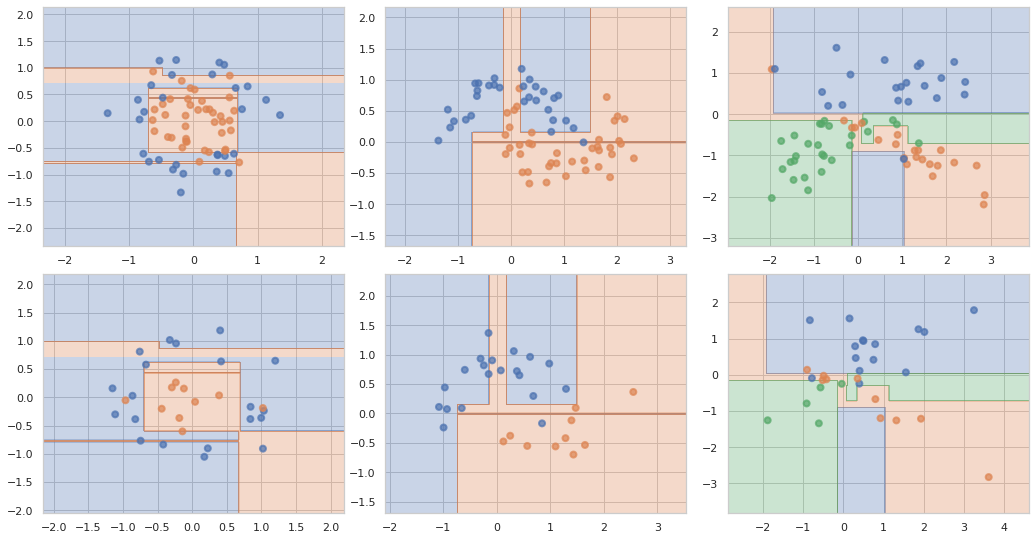

In [8]:
max_depth=None
min_samples_leaf=1
plt.figure(figsize=(15, 8))
for i, (X_train, X_test, y_train, y_test) in enumerate(data):
    clf  = DecisionTreeClassifier(min_samples_leaf=1).fit(X_train, y_train)
    plt.subplot(2, 3, i + 1)
    plot_surface(clf, X_train, y_train)
    plt.subplot(2, 3, 3 + i + 1)
    plot_surface(clf, X_test, y_test)
    print("Dataset", i + 1)
    print("Train:", clf.score(X_train, y_train), "Test:", clf.score(X_test, y_test))
    print("\n")

__Ответ:__ Модели слегка переобучились

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Dataset 1
max_depth	1	min_samples_leaf	1	Train	0.73	Test	0.47	Diff	0.26
max_depth	1	min_samples_leaf	5	Train	0.73	Test	0.47	Diff	0.26
max_depth	1	min_samples_leaf	10	Train	0.73	Test	0.47	Diff	0.26
max_depth	3	min_samples_leaf	1	Train	0.89	Test	0.73	Diff	0.15
max_depth	3	min_samples_leaf	5	Train	0.86	Test	0.8	Diff	0.06
max_depth	3	min_samples_leaf	10	Train	0.81	Test	0.77	Diff	0.05
max_depth	5	min_samples_leaf	1	Train	0.97	Test	0.73	Diff	0.24
max_depth	5	min_samples_leaf	5	Train	0.87	Test	0.9	Diff	0.03
max_depth	5	min_samples_leaf	10	Train	0.81	Test	0.77	Diff	0.05


Dataset 2
max_depth	1	min_samples_leaf	1	Train	0.84	Test	0.8	Diff	0.04
max_depth	1	min_samples_leaf	5	Train	0.84	Test	0.8	Diff	0.04
max_depth	1	min_samples_leaf	10	Train	0.84	Test	0.8	Diff	0.04
max_depth	3	min_samples_leaf	1	Train	0.91	Test	0.93	Diff	0.02
max_depth	3	min_samples_leaf	5	Train	0.89	Test	0.8	Diff	0.09
max_depth	3	min_samples_leaf	10	Train	0.87	Test	0.77	Diff	0.1
max_depth	5	min_samples_leaf	1	Train	1.0	Test	0.87

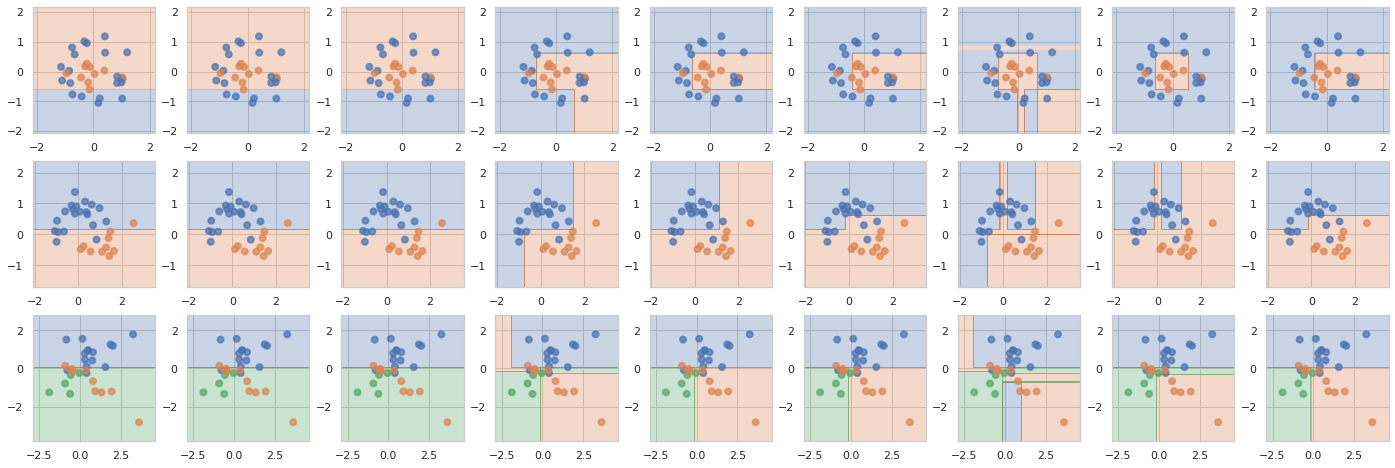

In [9]:
max_depths = [1, 3, 5]
min_samples_leafs = [1, 5, 10]

h = len(data)
w = len(max_depths) * len(min_samples_leafs)

plt.figure(figsize=(20, 7))
for i, (X_train, X_test, y_train, y_test) in enumerate(data):
    print("Dataset", i + 1)
    for j, max_depth in enumerate(max_depths):
        for k, min_samples_leaf in enumerate(min_samples_leafs):
            clf  = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf).fit(X_train, y_train)
            
            plt.subplot(h, w, i * w + j * len(max_depths) + k + 1)
            plot_surface(clf, X_test, y_test)
            print(
                "max_depth", max_depth, 
                "min_samples_leaf", min_samples_leaf, 
                "Train", round(clf.score(X_train, y_train), 2), 
                "Test", round(clf.score(X_test, y_test), 2), 
                "Diff", round(abs(clf.score(X_train, y_train) - clf.score(X_test, y_test)), 2),
                sep='\t'
            )
    print("\n")

__Ответ:__ При уменьшении глубины дерева, поверхность становиться проще, но дерево теряет свою обобщаю способность из-за переобучения. 

При увеличение min_samples_leaf поверхность становиться проще, дерево повышает свою обобщаю способность из-за недообучения, но до определенного момента. 

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.
    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)
    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)
    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [10]:
import hw5code

students = pd.read_csv('students.csv')
students.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [11]:
features = students.columns.values[:-1]
target = students.columns.values[-1]

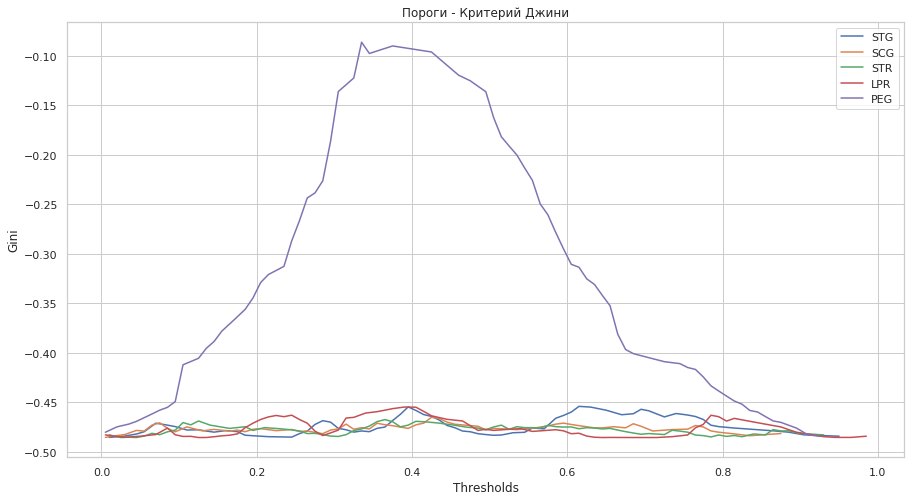

In [12]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(features):
    feature_vector = students[feature].as_matrix()
    target_vector = students[target].as_matrix()
    thresholds, gini, _, _ = hw5code.find_best_split(feature_vector, target_vector)
    plt.plot(thresholds, gini, label=feature)
    
plt.xlabel("Thresholds")
plt.ylabel("Gini")
plt.title('Пороги - Критерий Джини')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

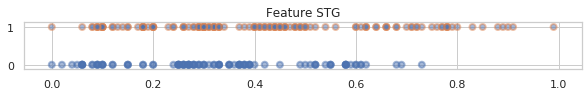

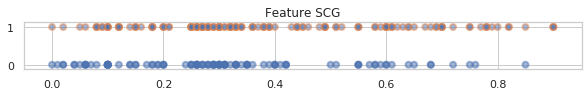

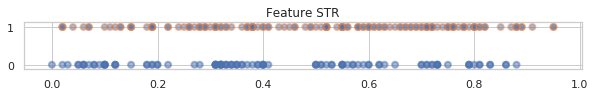

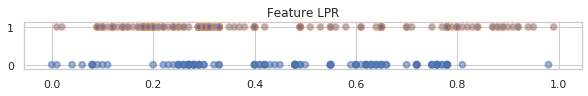

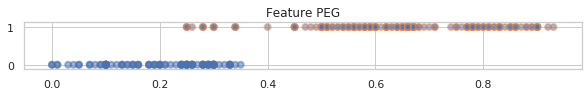

In [13]:
plt.subplots_adjust(top=1, hspace=1.5)
for i, feature in enumerate(features):
    plt.figure(figsize=(10, 5))
    plt.subplot(5, 1, i + 1)
    X = students[feature].as_matrix().reshape(-1, 1)
    y = students[' UNS'].as_matrix()
    clf = DecisionTreeClassifier().fit(X, y)
    
    plt.scatter(X, y, cmap=ListedColormap(palette), alpha=0.5,
                edgecolors=np.array(palette)[y], linewidths=2)
    plt.title("Feature " + feature)
    plt.show()

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Да, результаты согласуются, нужно делить по PEG. Кривая похожа на нормальное распределение. Много шума, никакой закономерности нет.

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [14]:
def get_matrix_data(data, features, target, test_size):
    data_x = data[features]
    data_y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=test_size, random_state=42)

    return X_train.as_matrix(), X_test.as_matrix(), y_train.as_matrix(), y_test.as_matrix()

In [15]:
feature_types = ["real" for i in range(len(features))]

X_train, X_test, y_train, y_test = get_matrix_data(students, features, target, 0.3)

In [16]:
from sklearn.metrics import accuracy_score, make_scorer, r2_score

clf = hw5code.DecisionTree(feature_types)
clf.fit(X_train, y_train)
print("My decision tree", accuracy_score(clf.predict(X_test), y_test))

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("DecisionTreeClassifier", accuracy_score(clf.predict(X_test), y_test))

My decision tree 0.9487179487179487
DecisionTreeClassifier 0.9743589743589743


__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [17]:
mushrooms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)

In [18]:
features = mushrooms.columns.values[1:]
target = mushrooms.columns.values[0]

In [19]:
def label_encoder(data):
    le = LabelEncoder()
    for column in data.columns.values:
        data[column] = le.fit_transform(data[column])

In [20]:
label_encoder(mushrooms)

In [21]:
feature_types = ["categorical" for i in range(len(features))]

X_train, X_test, y_train, y_test = get_matrix_data(mushrooms, features, target, 0.5)

In [22]:
clf = hw5code.DecisionTree(feature_types)
clf.fit(X_train, y_train)
print("My decision tree", accuracy_score(clf.predict(X_test), y_test))

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("DecisionTreeClassifier", accuracy_score(clf.predict(X_test), y_test))

My decision tree 1.0
DecisionTreeClassifier 1.0


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [23]:
tic_tac_toe = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data", header=None)
cars = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data", header=None)
nursery = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data", header=None)

In [24]:
label_encoder(tic_tac_toe)
label_encoder(cars)
label_encoder(nursery)

In [25]:
def transform_data(data):
    ohe = OneHotEncoder(sparse=False)
    return ohe.fit_transform(data.as_matrix()[:, :-1])

In [36]:
datasets = [mushrooms, tic_tac_toe, cars, nursery]
scores = [[] for i in range(4)]
types = ['real', 'categorical']

In [37]:
count = 0
for _type in types:
    for dataset in datasets:
        feature_types = [_type for i in range(dataset.as_matrix()[:, :-1].shape[1])]
        scores[count].append(max(cross_val_score(
            hw5code.DecisionTree(feature_types), 
            dataset.as_matrix()[:, :-1],
            dataset.as_matrix()[:, -1],
            scoring=make_scorer(accuracy_score),
            cv=10)))
    count += 1
for dataset in datasets:
    ohe_dataset = transform_data(dataset)
    feature_types = ['real' for i in range(ohe_dataset.shape[1])]
    scores[2].append(max(cross_val_score(
        DecisionTreeClassifier(), 
        ohe_dataset,
        dataset.as_matrix()[:, -1],
        scoring=make_scorer(accuracy_score),
        cv=10)))
for dataset in datasets:
    scores[3].append(max(cross_val_score(
        DecisionTreeClassifier(), 
        dataset.as_matrix()[:, :-1],
        dataset.as_matrix()[:, -1],
        scoring=make_scorer(accuracy_score),
        cv=10)))

In [38]:
results = pd.DataFrame(scores)
results.columns = ['mushrooms', 'tictactoe', 'cars', 'nursery']
results['name'] = ['real', 'cat', 'real + oh', 'sklearn']
results.set_index('name').transpose()

name,real,cat,real + oh,sklearn
mushrooms,0.911439,0.911439,0.661747,0.661747
tictactoe,0.864583,0.979167,0.957895,0.936842
cars,1.000000,1.000000,0.942529,0.959302
nursery,1.000000,1.000000,0.961479,0.946071


In [39]:
features = tic_tac_toe.columns.values[1:]
target = tic_tac_toe.columns.values[0]

In [40]:
X_train, X_test, y_train, y_test = get_matrix_data(tic_tac_toe, features, target, 0.3)

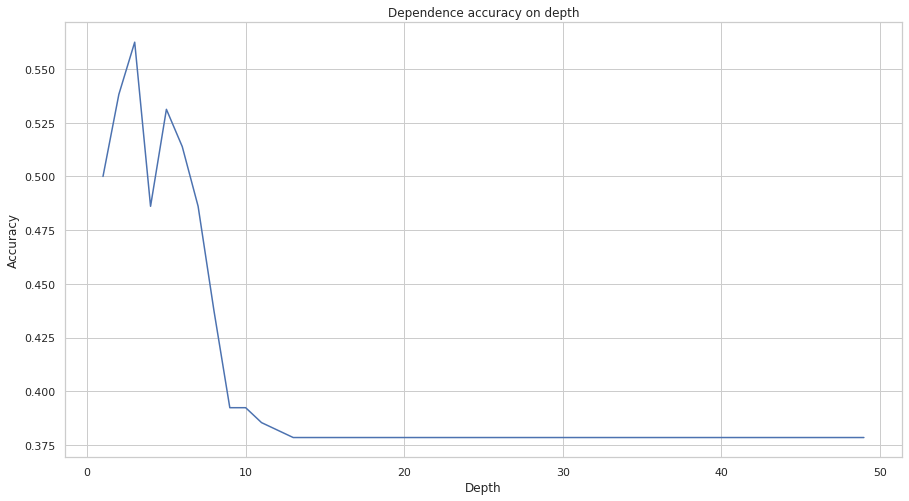

In [43]:
max_depths = np.arange(1, 50)
accuracy = []
for max_depth in max_depths:
    feature_types = ['categorical' for i in range(len(features))]
    clf = hw5code.DecisionTree(feature_types, max_depth=max_depth)
    clf.fit(X_train, y_train)
    accuracy.append(accuracy_score(clf.predict(X_test), y_test))
plt.figure(figsize=(15, 8))
plt.plot(max_depths, accuracy)
plt.title('Dependence accuracy on depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy');

__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**  Нет. Различия в количестве категорий и просто количестве
категориальных признаков из-за которых  дерево приобретает разную структуру(ширину и длину), поэтому мы получаем разный результат.
Еще напрмер второй датасет показывает худший результат в среднем, т. к. если посмотреть на размер датасета - он меньше остальных, и модели не хватает данных для выявления закономерности.
Какой либо компоненты случайности нет. Улучшить можно, например построив ансамбль.